# Yale Hackathon

## 1(a)

In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np

### Fock State

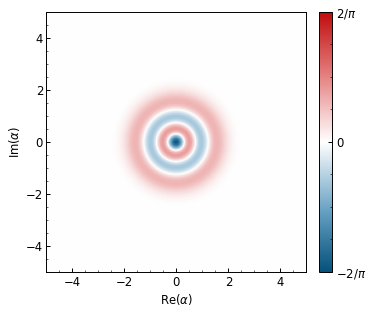

In [16]:
n_max = 20
fock = 3
psi = dq.fock(n_max, fock)
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### Gaussian/Coherent State

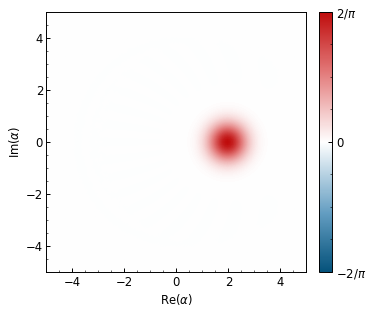

In [18]:
n_max = 20
alpha = 2
psi = dq.coherent(n_max, alpha)
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### 2-Cat State

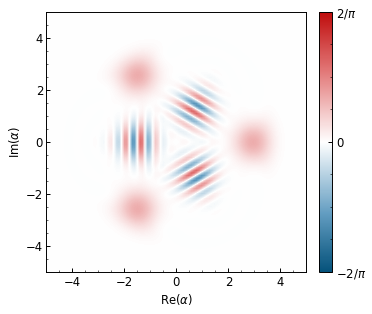

In [49]:
n_max = 20
alpha = 3
psi = dq.unit(dq.coherent(n_max, alpha*np.exp(1j*(2/3)*jnp.pi)) + \
        dq.coherent(n_max, alpha*np.exp(1j*(4/3)*jnp.pi)) +\
        dq.coherent(n_max, alpha*np.exp(1j*(6/3)*jnp.pi)))
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### 3-Cat State

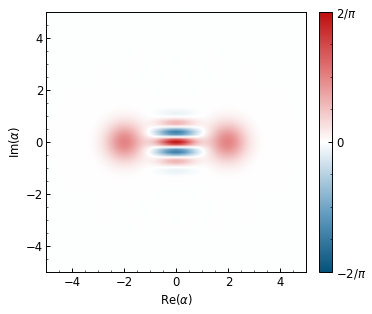

In [60]:
n_max = 20
alpha = 2
psi = dq.unit((dq.coherent(n_max, alpha) + dq.coherent(n_max, -alpha)))
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### Dissipative Cat State from a Two-Photon Exchange Hamiltonian

In [61]:
jnp.zeros(n_max)

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [2]:
n_max = 20
a = dq.destroy(n_max)
H = jnp.zeros(n_max)
jump_ops = [a @ a - 4.0 * dq.eye(n_max)]  # cat state inflation
psi0 = dq.coherent(n_max, 0)
tsave = jnp.linspace(0, 1.0, 1001)
result = dq.mesolve(H, jump_ops, psi0, tsave)
gif = dq.plot.wigner_gif(result.states, fps=25, xmax=4.0, ymax=2.0)

ValueError: Argument `H` must have shape (...H, n, n), but has shape H.shape=(20,).

In [ ]:
import jax.numpy as jnp
import dynamiqs as dq
import dynamiqs.plot as dqp

# 1) Set up a two-mode system & Hilbert Space truncation
n_a = 12
n_b = 12

# Annihilation operators for modes a and b
a = dq.destroy(n_a)
b = dq.destroy(n_b)

# Parameters
g2      = 1.0         # two-photon exchange coupling
eps_b   = -4.0        # drive on mode b
kappa_b = 10.0        # dissipation rate on mode b
T       = 4.0         # total time
nt      = 101         # number of time points

# Define the two-photon exchange Hamiltonian:
#   H = g2^* a^dagger^2 b + g2 a^2 b^dagger + eps_b^* b + eps_b b^dagger
a_sq      = a @ a
a_sq_dag  = dq.dag(a) @ dq.dag(a)
b_dag     = dq.dag(b)

H = (
    jnp.conjugate(g2) * a_sq_dag @ b
  + g2                * a_sq     @ b_dag
  + jnp.conjugate(eps_b) * b
  + eps_b                * b_dag
)

# Single Lindblad jump operator on mode b:
#   sqrt(kappa_b) * b
jump_ops = [ jnp.sqrt(kappa_b) * b ]

# Initial two-mode vacuum state
psi0 = dq.tensor(
    dq.basis(n_a, 0),
    dq.basis(n_b, 0)
)

# Times at which we save the density matrix
tlist = jnp.linspace(0, T, nt)

# ------------------------------------------------
# 2) Solve the master equation
# ------------------------------------------------
result = dq.mesolve(H, jump_ops, psi0, tlist)

# `result.states` is a list of two-mode density matrices ρ(t).

# ------------------------------------------------
# 3) Partial-trace out mode b so we can plot Wigner of mode a
# ------------------------------------------------
# In dynamiqs, `dq.ptrace(rho, [0])` keeps subsystem 0 (mode a).
# This returns a single-mode density matrix for each time point.
states_a = []
for rho2mode in result.states:
    rho_a = dq.ptrace(rho2mode, [0])  # keep only mode a
    states_a.append(rho_a)

# ------------------------------------------------
# 4) Make an animated GIF of the Wigner function of mode a
# ------------------------------------------------
# dynamiqs.plot.wigner_gif wants a list/array of single-mode states.
gif = dqp.wigner_gif(
    states_a,
    fps=10,          # frames per second
    gif_duration=5,  # total length (seconds) of the animated gif
    xmax=5.0,        
    ymax=5.0,        
    npixels=101,     # resolution in x-p
    cmap="RdBu_r",   
    vmax=0.4         # Wigner color scale max (choose to taste)
)
